In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns 

In [4]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [5]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels = "inferred",
    label_mode = "categorical",
    class_names = None ,
    color_mode = "rgb",
    batch_size = 32,
    image_size = (128, 128),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = "bilinear",
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 70295 files belonging to 38 classes.


2025-09-23 10:22:59.531889: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4
2025-09-23 10:22:59.531969: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-09-23 10:22:59.531979: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.92 GB
2025-09-23 10:22:59.532012: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-09-23 10:22:59.532022: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [10]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels = "inferred",
    label_mode = "categorical",
    class_names = None ,
    color_mode = "rgb",
    batch_size = 32,
    image_size = (128, 128),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = "bilinear",
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 17572 files belonging to 38 classes.



To avoid overshooting 
1. Choose small learning rate , defautl is 0.001 and we will take 0.0001
2. There may be a chance of underfitting , so increase the number of neuron
3. Add more convolution layer to extract more features from images , there may be possibility that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature 

In [11]:
cnn = tf.keras.models.Sequential()

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

/Users/thelucifer/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [15]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [16]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [17]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [18]:
cnn.add(tf.keras.layers.Flatten())

In [19]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [20]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [21]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

Compilling model

In [23]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [26]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,528,288 (89.75 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,685,526 (59.84 MB)

In [27]:
training_history = cnn.fit(x = training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 285s 130ms/step - accuracy: 0.8890 - loss: 0.3773 - val_accuracy: 0.9227 - val_loss: 0.2573
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 326s 148ms/step - accuracy: 0.9149 - loss: 0.2978 - val_accuracy: 0.9356 - val_loss: 0.2176
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 310s 141ms/step - accuracy: 0.9296 - loss: 0.2483 - val_accuracy: 0.9364 - val_loss: 0.2319
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 300s 137ms/step - accuracy: 0.9415 - loss: 0.2127 - val_accuracy: 0.9471 - val_loss: 0.2195
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 914s 416ms/step - accuracy: 0.9498 - loss: 0.1913 - val_accuracy: 0.9355 - val_loss: 0.3434
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 301s 137ms/step - accuracy: 0.9551 - loss: 0.1710 - val_accuracy: 0.9573 - val_loss: 0.1808
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 334s 152ms/step - accuracy: 0.9607 - loss: 0.1579 - val_accuracy: 0.9447 - val_loss: 0.2474
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 331s 150ms/step - ac

## Model evaluation


In [32]:
# Model Evaluation on Training Set ~
train_loss , train_acc = cnn.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 0.9697 - loss: 0.1382


In [34]:
print ( train_loss, train_acc)

0.13818900287151337 0.9696564674377441


In [35]:
# Model on Validation Set ~
val_loss , val_acc = cnn.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.9402 - loss: 0.3456


In [36]:
print ( val_loss, val_acc)

0.3456448018550873 0.9401889443397522


## Saving Model


In [38]:
# To save the model in .keras form 
cnn.save("trained_model.keras")

In [51]:
training_history.history

{'accuracy': [0.8890106081962585,
  0.9148872494697571,
  0.9295540452003479,
  0.9414894580841064,
  0.9498115181922913,
  0.955089271068573,
  0.9606515169143677,
  0.9615193009376526,
  0.968091607093811,
  0.9692581295967102],
 'loss': [0.37725627422332764,
  0.2978067398071289,
  0.24825115501880646,
  0.21269826591014862,
  0.1912938505411148,
  0.17099177837371826,
  0.15785397589206696,
  0.15984191000461578,
  0.1434003710746765,
  0.13881434500217438],
 'val_accuracy': [0.9226610660552979,
  0.9355793595314026,
  0.9363760352134705,
  0.9470748901367188,
  0.9355224370956421,
  0.9572615623474121,
  0.9447416067123413,
  0.9570908546447754,
  0.9618711471557617,
  0.9401889443397522],
 'val_loss': [0.2573467791080475,
  0.21759560704231262,
  0.23188859224319458,
  0.2195444107055664,
  0.3433750569820404,
  0.18076321482658386,
  0.24742615222930908,
  0.2086375206708908,
  0.17539623379707336,
  0.3456450402736664]}

In [40]:
# Recording history in JSON 
import json
with open ("training_hist.json", "w") as f :
    json.dump(training_history.history, f)

## Accuracy Visualization 


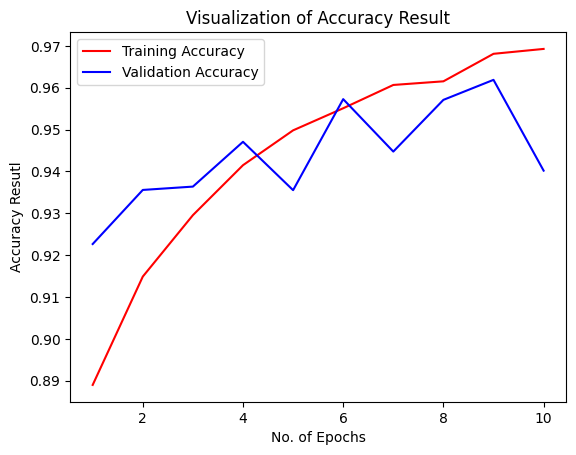

In [52]:
epochs = [ i for i in range (1,11)]
plt.plot(epochs, training_history.history['accuracy'], color = 'red', label = 'Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color = 'blue', label = 'Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Resutl")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

## Some other matrices for model evaluation 

In [77]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [78]:
 # Now the test folder doesnt contain all the images of every 38 classes thats why im using the valid folder 
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels = "inferred",
    label_mode = "categorical",
    class_names = None ,
    color_mode = "rgb",
    batch_size = 32,
    image_size = (128, 128),
    shuffle = False,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = "bilinear",
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 17572 files belonging to 38 classes.


In [79]:
y_pred = cnn.predict(test_set)
y_pred, y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step


(array([[1.0000000e+00, 3.7687184e-18, 1.1492667e-26, ..., 0.0000000e+00,
         1.8577163e-35, 6.6350832e-32],
        [1.0000000e+00, 9.8578391e-19, 5.6683692e-30, ..., 0.0000000e+00,
         4.1912955e-38, 0.0000000e+00],
        [1.0000000e+00, 2.3163392e-24, 1.6463209e-37, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        ...,
        [3.5749757e-08, 1.7216621e-14, 1.6623309e-12, ..., 4.4462468e-11,
         2.2243543e-13, 9.9999666e-01],
        [6.9005454e-19, 2.1879018e-24, 5.5106236e-20, ..., 1.8495953e-16,
         1.3040735e-20, 1.0000000e+00],
        [5.2093839e-33, 1.8537279e-38, 2.3754105e-36, ..., 6.4278178e-35,
         1.9970640e-28, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [ ]:
predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
true_categories = tf.concat([y for x,y in test_set], axis=0)
true_categories

2025-09-23 14:40:01.251312: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [83]:
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

<img src="image.png" alt="Confusion matrix" width="800">


In [84]:
from sklearn.metrics import classification_report , confusion_matrix

In [82]:
print(classification_report(Y_true, predicted_categories, target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.75      1.00      0.86       504
                                 Apple___Black_rot       0.99      0.98      0.98       497
                          Apple___Cedar_apple_rust       0.96      0.98      0.97       440
                                   Apple___healthy       0.97      0.82      0.89       502
                               Blueberry___healthy       0.97      0.94      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.97      0.98      0.98       421
                 Cherry_(including_sour)___healthy       0.99      0.95      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.85      0.90       410
                       Corn_(maize)___Common_rust_       0.95      0.99      0.97       477
               Corn_(maize)___Northern_Leaf_Blight       0.92      0.97      0.

In [85]:
cm = confusion_matrix(Y_true, predicted_categories)
cm.shape

(38, 38)

## Confusion Matrix Visualization 

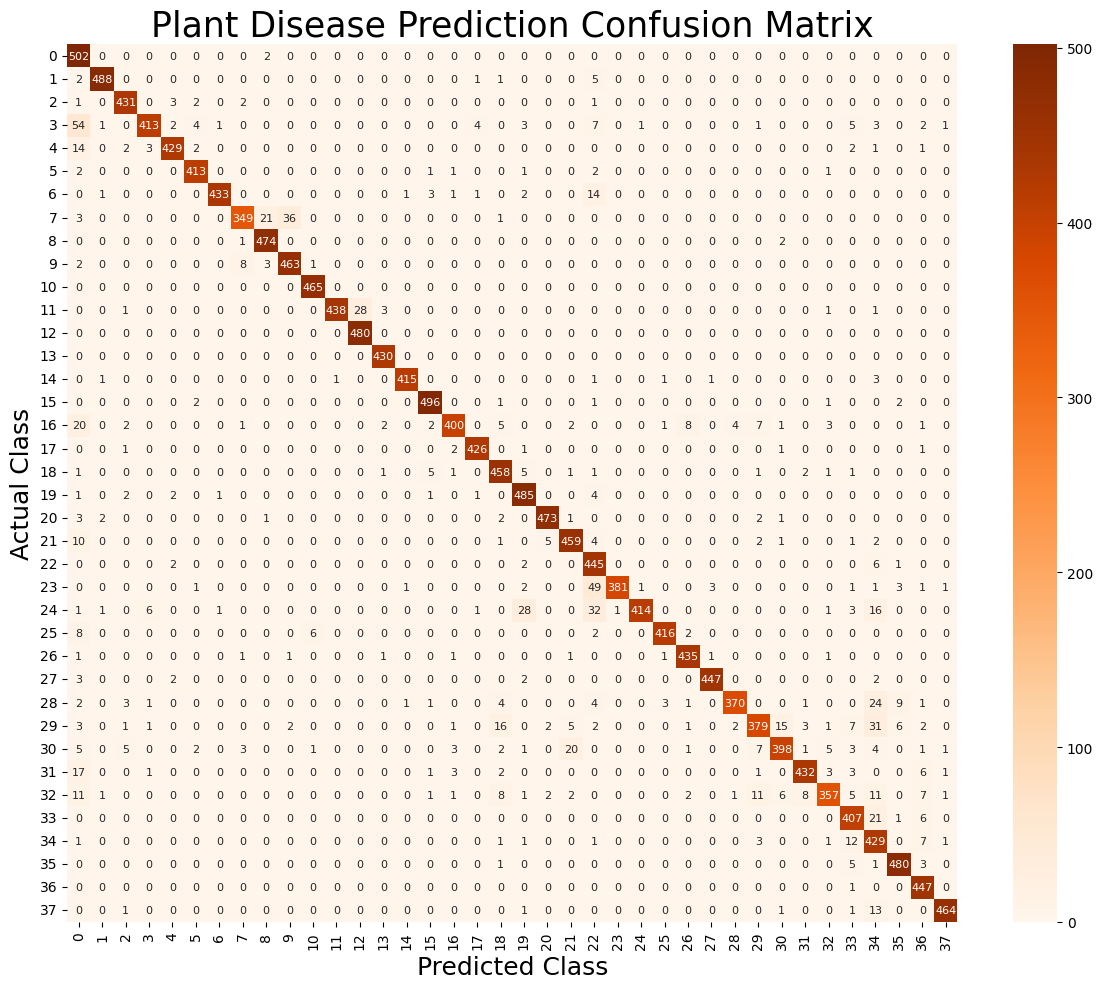

In [97]:
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", annot_kws={"size": 8}, cmap="Oranges")
plt.xlabel("Predicted Class", fontsize=18)
plt.ylabel("Actual Class", fontsize=18)
plt.title("Plant Disease Prediction Confusion Matrix", fontsize=25)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
